# Laboratorium 10

## Potrzebne importy

In [1]:
using Plots
using Polynomials
using SpecialPolynomials
using LinearAlgebra
using CSV
using DataFrames
using Statistics

## Zadanie 1
Narysować 6 pierwszych wielomianów Hermita

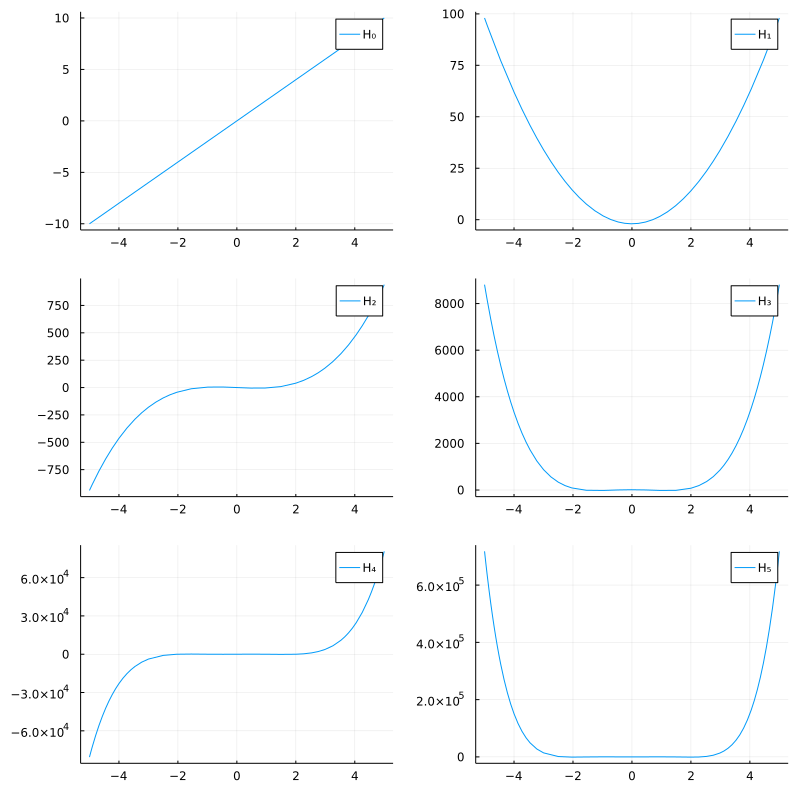

In [17]:
extrema = (-5, 5)
n = 6
hermites = [x -> basis(Hermite, i)(x) for i ∈ 1:n]
titles = ["H₀" "H₁" "H₂" "H₃" "H₄" "H₅"]

plot(size=(800, 800), layout=(3,2))
plot!(hermites, extrema..., labels=titles)

## Zadanie 2
Narysować 6 pierwszych funkcji aproksymujących

In [3]:
# argument 'norm' na potrzeby wykresów
function base_fun(k, xrange; norm=true)
    H_k = basis(Hermite, k).(xrange)
    app = H_k .* exp.(-(xrange.^2)/2)
    norm ? normalize(app) : app # normalize to have norm 1
end

base_fun (generic function with 1 method)

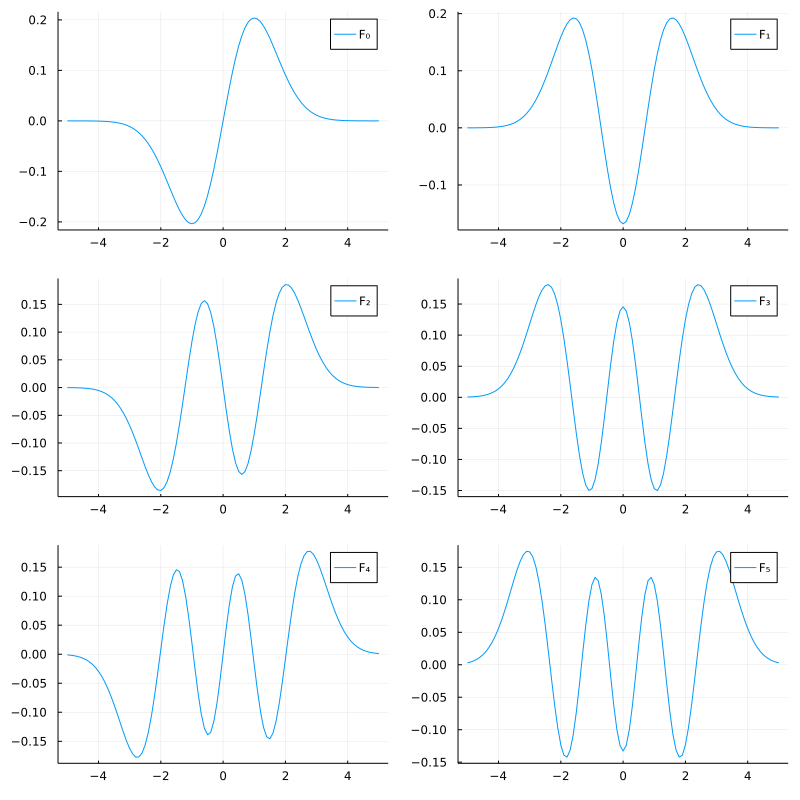

In [4]:
extrema = (-1, 1)
n = 6
xx = -5:.1:5

polynomials = [base_fun(k, xx) for k ∈ 1:n]
labels = ["F₀" "F₁" "F₂" "F₃" "F₄" "F₅"]
args = [collect(xx) for _ ∈ 1:n]

plot(size=(800, 800), layout=(3,2))
plot!(args, polynomials, labels=labels)

## Zadanie 3
Pokazać, że same wielomiany nie są ortogonalne, ale już z funkcją wagową $e^{-x^2}$ są. Użyć metody z wektorami wartości, założyć pewien przedział.

### Teoria:
__Wielomiany ortogonalne__ to rodzina wielomianów, w których iloczyn dwóch różnych wielomianów jest równa 0. Iloczyn skalarny dwóch wielomianów można zdefiniować jako:

$<P_m,P_n>=\int_a^b P_n(x)P_m(x)W(x)dx = 0$

Gdzie $W$ jest funkcją wagową.

In [5]:
xx = -5:.1:5
n = 10
H = [basis(Hermite, i).(xx) for i ∈ 0:n-1]
F = [base_fun(i, xx) for i ∈ 0:n-1]

M = Array{Float64, 2}(undef, n, n); 

In [6]:
for (i, hᵢ) ∈ enumerate(H) 
    for (j, hⱼ) ∈ enumerate(H)
        M[i,j] = dot(hᵢ, hⱼ)
    end
end
M

10×10 Matrix{Float64}:
  101.0             5.32907e-15  3232.0          …   5.21801e8    1.56462e-7
    5.32907e-15  3434.0            -2.84217e-13     -4.47035e-8   3.49263e10
 3232.0            -2.84217e-13     1.96801e5        4.43837e10  -7.62939e-6
   -1.13687e-13     1.89529e5       7.27596e-12     -1.52588e-5   2.9174e12
    1.70137e5      -7.27596e-12     1.2485e7         3.49234e12  -0.00146484
   -1.45519e-11     1.13091e7      -3.72529e-9   …  -6.10352e-5   2.23236e14
    9.60771e6       6.98492e-10     7.72802e8        2.5049e14   -0.0351562
   -6.98492e-10     6.56309e8      -1.63913e-7       0.0625       1.5391e16
    5.21801e8      -4.47035e-8      4.43837e10       1.60477e16   7.25
    1.56462e-7      3.49263e10     -7.62939e-6       7.25         9.3355e17

In [7]:
for (i, fᵢ) ∈ enumerate(F) 
    for (j, fⱼ) ∈ enumerate(F)
        M[i,j] = dot(fᵢ, fⱼ)
    end
end
M

10×10 Matrix{Float64}:
  1.0           4.46201e-19  -3.25357e-11  …  -1.93005e-8    1.68051e-18
  4.46201e-19   1.0          -1.16044e-18     -2.49366e-18  -2.83828e-7
 -3.25357e-11  -1.16044e-18   1.0             -7.16466e-7   -2.60209e-18
 -3.22847e-18  -9.61163e-10  -8.92434e-18      3.46945e-18  -5.86523e-6
 -4.52405e-10  -5.28549e-19  -1.67261e-8      -1.0043e-5     0.0
  2.18535e-18  -9.92118e-9    3.25261e-19  …   8.67362e-18  -6.11316e-5
 -3.63734e-9    2.1684e-19   -1.34723e-7      -8.15283e-5    6.93889e-18
 -5.69206e-19  -6.42043e-8    1.51788e-18     -1.38778e-17  -0.000400303
 -1.93005e-8   -2.49366e-18  -7.16466e-7       1.0           6.93889e-18
  1.68051e-18  -2.83828e-7   -2.60209e-18      6.93889e-18   1.0

Można zauważyć, że w pierwszym przypadku niektóre iloczyny wynoszą dużo ponad $0$ (np. $1.6 \cdot 10^{16}$). Można więc stwierdzić, że wielomiany nie są ortogonalne.
W drugim przypadku wartości poza główną przekątną mają wartości bliskie zero (wynika to z błędów numerycznych). Można przyjąć, że są one równe zero, a więc wielomiany są ortogonalne. 

## Zadanie 4
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V.

In [8]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)

xx_ekg = ekg_data.time * 40
yy_ekgV = ekg_data.signalV
yy_ekgN = ekg_data.signalN;

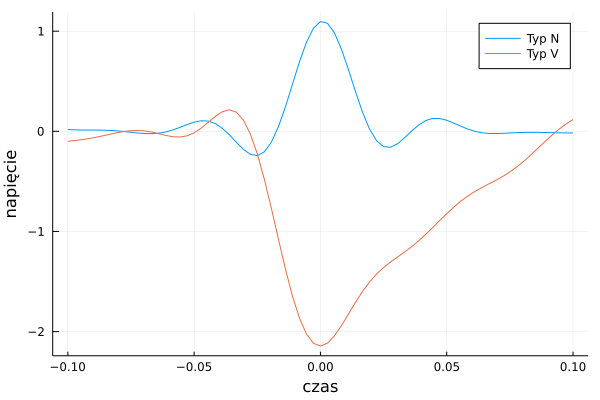

In [9]:
plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [10]:
function approximations(xx, yy; n=5)
    F = [base_fun(i, xx) for i ∈ 0:n-1]
    C = [dot(yy, fᵢ) for fᵢ ∈ F]
    app = [cᵢ * fᵢ for (cᵢ, fᵢ) ∈ zip(C,F)]
    cumulative_app = [sum(app[1:i]) for i ∈ 1:length(app)]
end

approximations (generic function with 1 method)

In [11]:
function plotApproximations(xx, yy; n=5, kwargs...)
    cumulative_app = approximations(xx, yy, n=n)
    labels = ["H$(i-1)" for i ∈ 1:n]
    labels = reshape(labels, 1, length(labels))
    plot(xx, yy, markershape=:circle)
    plot!(xx, cumulative_app; label=labels, kwargs...)
end

plotApproximations (generic function with 1 method)

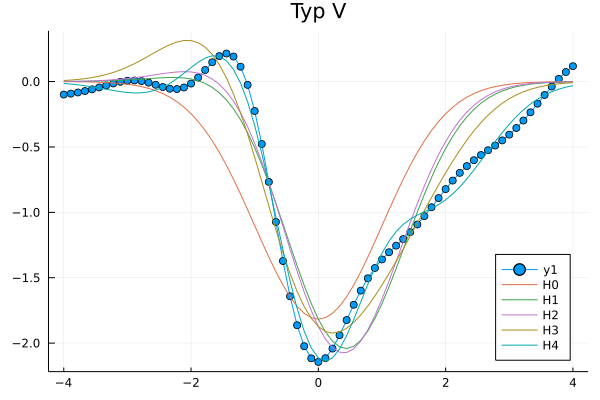

In [12]:
plotApproximations(xx_ekg, yy_ekgV; title="Typ V", legend=:bottomright)

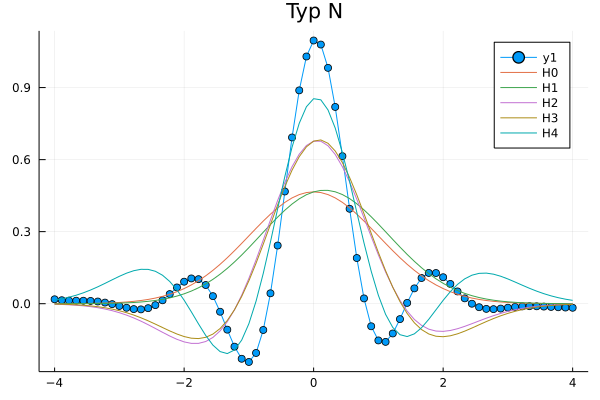

In [13]:
plotApproximations(xx_ekg, yy_ekgN; title="Typ N", legend=:topright)

## Zadanie 5
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [14]:
mse(y1, y2) = mean((y1-y2).^2)

function plotErrors(xx, yy; n=11, kwargs...)
    app = approximations(xx, yy; n=n)
    errors = [mse(yy, appᵢ) for appᵢ ∈ app]
    xs = 0:n-1
    scatter(xs, errors; xticks=xs, kwargs...)
end

plotErrors (generic function with 1 method)

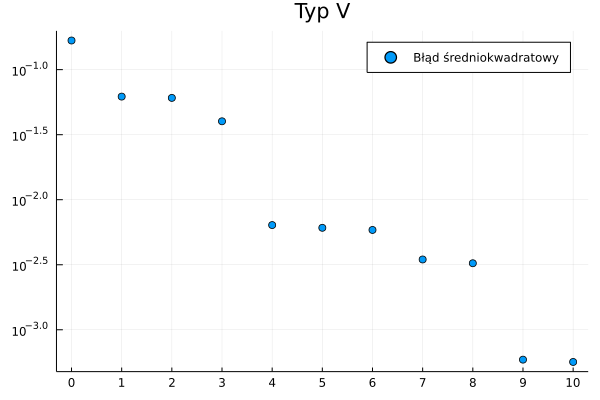

In [15]:
plotErrors(xx_ekg, yy_ekgV, title="Typ V", label="Błąd średniokwadratowy", yscale=:log10)

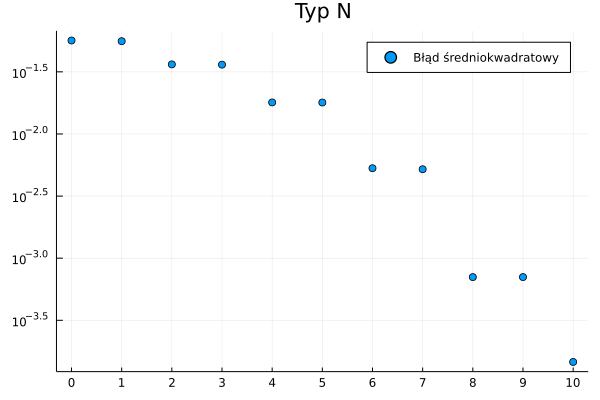

In [16]:
plotErrors(xx_ekg, yy_ekgN, title="Typ N", label="Błąd średniokwadratowy", yscale=:log10)